# LAB ASSIGNMENT 3

In [15]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\Anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



**Name:** SHUBHADIP CHAKRABARTI

**Registration Number:** 19BAI1113

**Objectives:** 

    1. To Explore the Different Types of Edge Detection Techniques
    2. Compare the different Edge Detction Techniques

**Image**: Retina Image (Normal-Fundus) 

### Importing Necessary Modules and Functions

In [1]:
#import open CV
import cv2

#import numpy
import numpy as np

#import pandas
import pandas as pd

#import matplotlib for plotting the images
import matplotlib.pyplot as plt

#import scikit-image for image operations
from skimage import io, color

### Loading Image into the Python Notebook

Text(0.5, 1.0, 'Original Image in BGR configuration')

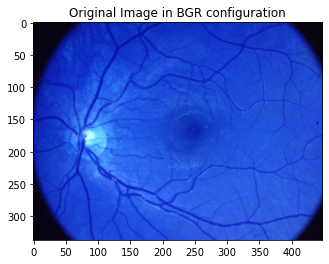

In [27]:
# Load the input image
original_image = cv2.imread('normal-fundus.png')
plt.imshow(original_image)
plt.title("Original Image in BGR configuration")

We note that the image is obtained in BGR configuration. 

We now convert the BGR Configured Image to RGB Configured Image. 

### Conversion of BGR Image to RGB Image

Text(0.5, 1.0, 'Image in RGB Configuration')

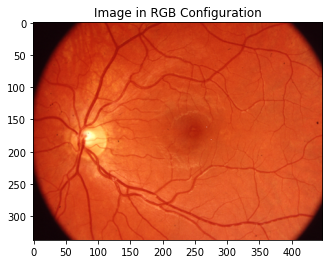

In [3]:
#convert to RGB Confirgured Image
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Image in RGB Configuration")

In [4]:
#print the shape of the image
image.shape

(337, 448, 3)

## Grabcut Algorithm

Text(0.5, 1.0, 'Foreground Extraction using Grabcut Algorithm')

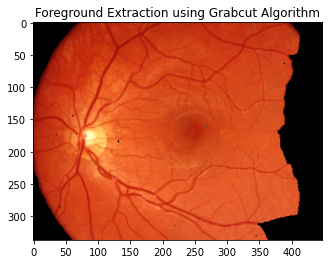

In [5]:
mask = np.zeros(image.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (0,0,420,400)

cv2.grabCut(image, mask, rect, bgdModel, fgdModel,6,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
grabcut_image = image*mask2[:,:,np.newaxis]

plt.imshow(grabcut_image)
plt.title("Foreground Extraction using Grabcut Algorithm")

## Contour Detection Algorithm

Text(0.5, 1.0, 'Foreground Extraction using Contour Detection Algorithm')

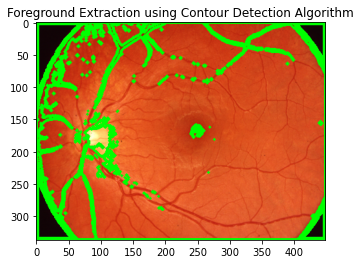

In [13]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image, 25, 355, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.imshow(contour_image)
plt.title("Foreground Extraction using Contour Detection Algorithm")

## BackgroundSubtractorMOG

Text(0.5, 1.0, 'Image after applying BackgroundSubtractionMOG Operation')

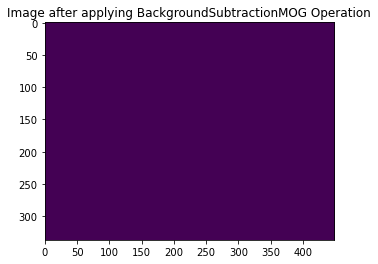

In [19]:
MOG = cv2.createBackgroundSubtractorMOG2()
MOG_image = MOG.apply(image)

plt.imshow(MOG_image)
plt.title("Image after applying BackgroundSubtractionMOG Operation")

Text(0.5, 1.0, 'Image after applying BackgroundSubtractionMOG2 Operation')

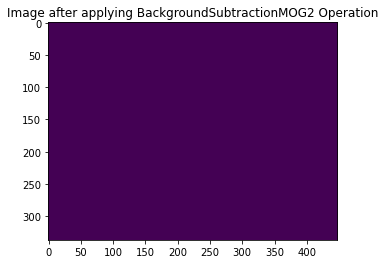

In [20]:
MOG2_image = cv2.createBackgroundSubtractorMOG2()
MOG2_image = MOG.apply(image)

plt.imshow(MOG2_image)
plt.title("Image after applying BackgroundSubtractionMOG2 Operation")

In [25]:
GMG_image = cv2.bgsegm.createBackgroundSubtractorGMG()
GMG_image = MOG.apply(image)

plt.imshow(GMG_image)
plt.title("Image after applying BackgroundSubtractionGMG Operation")

AttributeError: module 'cv2' has no attribute 'createBackgroundSubtractorGMG'

We now denoise the Gray Scale Image in order to have an Improved Image Analysis

### Denoising the Gray Scale Image 

In [ ]:
# Gaussian Filters used to Denoise the Gray Scale Image
image = cv2.GaussianBlur(gray_image, (3,3), 0)
plt.imshow(gray_image)
plt.title("Denoised Gray Scale View")

We could successfully obtain a Denoised Gray Scale Image from the Original Color Image. 

We now apply the four different types of Edge Detection Techniques on the above image.

The various Edge Detection Thresholding Techniques are: 

    1. Sobel Edge Detector
    2. Prewitt Edge Detector
    3. Laplacian Edge Detector
    4. Canny Edge Detector

We now first explore the Sobel Edge Detector Technique

## Sobel Edge Detector

In [ ]:
# Sobel Edge Detection on X axis
sobelx = cv2.Sobel(image, cv2.CV_64F, dx=1, dy=0, ksize=5)   # First Order Derivative on X
plt.imshow(sobelx)
plt.title("Sobel X Edge Detector")

In [ ]:
# Sobel Edge Detection on Y axis
sobely = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=1, ksize=5)   # First Order Derivative on Y
plt.imshow(sobely)
plt.title("Sobel Y Edge Detector")

In [ ]:
# Sobel Edge Detection on X and Y axis
sobelxy = cv2.Sobel(image, cv2.CV_64F, dx=1, dy=1, ksize=5)   # First Order Derivative on X and Y
plt.imshow(sobelxy)
plt.title("Sobel XY Edge Detector")

### Varying Parameters and Analyzing the Output

In [ ]:
# Sobel Edge Detection on X axis
sobelx = cv2.Sobel(image, cv2.CV_64F, dx=2, dy=0, ksize=5)   # Second Order Derivative on X
plt.imshow(sobelx)
plt.title("Sobel X Edge Detector")

In [ ]:
# Sobel Edge Detection on X axis
sobelx = cv2.Sobel(image, cv2.CV_64F, dx=3, dy=0, ksize=5)   # Third Order Derivative on X
plt.imshow(sobelx)
plt.title("Sobel X Edge Detector")

In [ ]:
# Sobel Y Edge Detection
sobely = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=2, ksize=5)   # Second Order Derivative on Y
plt.imshow(sobely)
plt.title("Sobel Y Edge Detector")

In [ ]:
# Sobel Y Edge Detection
sobely = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=3, ksize=5)    # Third Order Derivative on Y
plt.imshow(sobely)
plt.title("Sobel Y Edge Detector")

In [ ]:
# Sobel XY Edge Detection
sobelxy = cv2.Sobel(image, cv2.CV_64F, dx=2, dy=1, ksize=5)    # Second Order Derivative on X and First Order Derivative on Y
plt.imshow(sobelxy)
plt.title("Sobel XY Edge Detector")

In [ ]:
# Sobel XY Edge Detection
sobelxy = cv2.Sobel(image, cv2.CV_64F, dx=1, dy=2, ksize=5)    # First Order Derivative on X and Second Order Derivative on Y
plt.imshow(sobelxy)
plt.title("Sobel XY Edge Detector")

In [ ]:
# Sobel XY Edge Detection
sobelxy = cv2.Sobel(image, cv2.CV_64F, dx=2, dy=2, ksize=5)     # Second Order Derivative on X and Second Order Derivative on Y
plt.imshow(sobelxy)
plt.title("Sobel XY Edge Detector")

## Inference

As observed, Edges are relatively more clearly detected in lower order derivatives (of X and Y values). As the order of derivatives increase, the quality of edge detection decreases drastically.

We next explore the Prewitt Edge Detector

## Prewitt Edge Detector

In [ ]:
# Prewitt Edge Detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])  
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewittx = cv2.filter2D(image, -1, kernelx)     #X axis
prewitty = cv2.filter2D(image, -1, kernely)     #Y axis

plt.imshow(prewittx + prewitty)      #addition of images
plt.title("Prewitt Edge Detector")

### Varying Parameters and Analyzing the Output

In [ ]:
# Prewitt Edge Detection - weights are increased from 1 to 2
kernelx = np.array([[2,2,2],[0,0,0],[-2,-2,-2]])
kernely = np.array([[-2,0,2],[-2,0,2],[-2,0,2]])
prewittx = cv2.filter2D(image, -1, kernelx)
prewitty = cv2.filter2D(image, -1, kernely)
plt.imshow(prewittx + prewitty)
plt.title("Prewitt Edge Detector")

## Inference

As observed, we could successfully detect more edges on incrementing the values of the weight matrix

So we conclude that the increase in the values of the weight matrix leads to better quality of edge detection.

We now explore the Laplacian Edge Detector

## Laplacian Edge Detector

In [ ]:
# Laplacian Edge Detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(laplacian)
plt.title("Laplacian Edge Detector")

## Inference

As observed, we could successfully detect edges of the image.

We now expore the Canny Edge Detector

## Canny Edge Detector

In [ ]:
# Canny Edge Detection
canny = cv2.Canny(image, threshold1=80, threshold2=100)
plt.imshow(canny)
plt.title("Canny Edge Detector")

###  Varying Parameters and Analyzing the Output

In [ ]:
# Canny Edge Detection
canny = cv2.Canny(image, threshold1 = 25, threshold2 = 100)    #Threshold1 changed
plt.imshow(canny)
plt.title("Canny Edge Detector")

In [ ]:
# Canny Edge Detection
canny = cv2.Canny(image, threshold1 = 80, threshold2 = 200)    #Threshold2 changed
plt.imshow(canny)
plt.title("Canny Edge Detector")

In [ ]:
# Canny Edge Detection
canny = cv2.Canny(image, threshold1 = 25, threshold2 = 200)    #Threshold1 and Threshold2 changed
plt.imshow(canny)
plt.title("Canny Edge Detector")

### Inference

As soon as the Threshold value is increased, we could see that the number of edges detected are reduced. While on the other hand, on decreasing the value of threshold, we mistake the noise to be edges. 

Hence, we need to choose intermediate values of thresholds to carry proper edge detection task.

## Conclusion

We could acheive the following objectives in this exercise

    1. We could successfully explore the differnt Image Edge Detection Techniques.
    2. Explore the changes in the image with the change in the values of the parameters. 